In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [2]:
# Carregar o banco de dados
df = pd.read_excel(r"C:\Users\fluca\Desktop\2-unioeste\Ciências Econômicas\4º ano\2º bimestre\Econometria II\2º trabalho\heterocedasticidade\data\Trab_Cascavel_Heteroc_Reg_Mult.xlsx")
df.head()

,Renda,Idade,Ida_qua,Domic,Branco,Sexo
0,800,28,784,1,1,0
1,700,30,900,1,1,1
2,1200,32,1024,1,1,1
3,510,30,900,1,0,0
4,700,42,1764,1,0,1


In [3]:
df.rename(columns=({'Renda':'renda','Idade':'idade','Ida_qua':'idade²','Domic':'domic', 'Branco':'branco','Sexo':'sexo'}), inplace=True)

In [4]:
df.head()

,renda,idade,idade²,domic,branco,sexo
0,800,28,784,1,1,0
1,700,30,900,1,1,1
2,1200,32,1024,1,1,1
3,510,30,900,1,0,0
4,700,42,1764,1,0,1


In [5]:
print(df.columns)

Index(['renda', 'idade', 'idade²', 'domic', 'branco', 'sexo'], dtype='object')


In [6]:
# Criar o modelo de regressão múltipla
modelo = smf.ols("renda ~ idade + I(idade**2) + domic + branco + sexo", data=df).fit()

# Exibir os resultados da regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     94.67
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.79e-98
Time:                        09:20:53   Log-Likelihood:            -1.2237e+05
No. Observations:               13075   AIC:                         2.448e+05
Df Residuals:                   13069   BIC:                         2.448e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2128.7153    247.357     -8.606

In [7]:
# Calcular resíduos e quadrados dos resíduos
residuos = modelo.resid
quadrados_residuos = residuos ** 2

# Calcular os valores ajustados (preditos de y)
y_estimado = modelo.fittedvalues

In [8]:
# Ordenar a variável explicativa (idade) em ordem crescente
df_gq = df.sort_values(by="idade")
df_gq.tail()

,renda,idade,idade²,domic,branco,sexo
8841,2000,79,6241,1,1,1
9505,1000,79,6241,1,1,0
12354,510,79,6241,0,1,1
12435,1500,80,6400,0,1,1
8285,4000,80,6400,1,1,0


In [9]:
# Aplicar o teste de Goldfeld-Quandt
gq_test = het_goldfeldquandt(modelo.resid, df_gq[['idade']], alternative='increasing')

# Exibir resultados
print(f"Estatística F: {gq_test[0]}")
print(f"p-valor: {gq_test[1]}")

Estatística F: 6.8373506436673335
p-valor: 0.0


In [10]:
# Calcular o teste de Breusch-Pagan
bp_test = het_breuschpagan(modelo.resid, modelo.model.exog)

# Exibir os resultados
print(f"Estatística Qui-quadrado: {bp_test[0]}")
print(f"p-valor: {bp_test[1]}")

Estatística Qui-quadrado: 1.7024975333098018
p-valor: 0.8885849626866629


In [11]:
# Teste de White
white_test = het_white(modelo.resid, X)
print(f"p-valor do teste de White: {white_test[1]}")

NameError: name 'X' is not defined

In [12]:
# Ajustar modelo OLS
modelo_robusto = smf.ols("renda ~ idade + I(idade**2) + domic + branco + sexo", data=df).fit(cov_type="HC0")

# Exibir os resultados
print(modelo_robusto.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     110.0
Date:                Tue, 01 Apr 2025   Prob (F-statistic):          3.73e-114
Time:                        09:21:23   Log-Likelihood:            -1.2237e+05
No. Observations:               13075   AIC:                         2.448e+05
Df Residuals:                   13069   BIC:                         2.448e+05
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2128.7153    261.014     -8.156

In [13]:
# Criar DataFrame comparativo
resultados_comparacao = pd.DataFrame({
    "Variável": modelo.params.index,
    "Coef. OLS": modelo.params.values,
    "Std. OLS": modelo.bse.values,
    "p-valor OLS": modelo.pvalues.values,
    "Coef. white": modelo_robusto.params.values,
    "Std. white": modelo_robusto.bse.values,
    "p-valor white": modelo_robusto.pvalues.values
})

resultados_comparacao

,Variável,Coef. OLS,Std. OLS,p-valor OLS,Coef. white,Std. white,p-valor white
0,Intercept,-2128.715295,247.357094,8.434498e-18,-2128.715295,261.014224,3.475862e-16
1,idade,106.839474,11.418844,9.576527e-21,106.839474,12.257915,2.883092e-18
2,I(idade ** 2),-1.052698,0.140982,8.729527e-14,-1.052698,0.142414,1.448638e-13
3,domic,520.064563,116.019608,7.438111e-06,520.064563,66.868245,7.399985e-15
4,branco,595.491215,54.895515,2.672382e-27,595.491215,45.340060,2.105648e-39
5,sexo,629.567298,49.729125,1.614843e-36,629.567298,49.524013,5.048461e-37


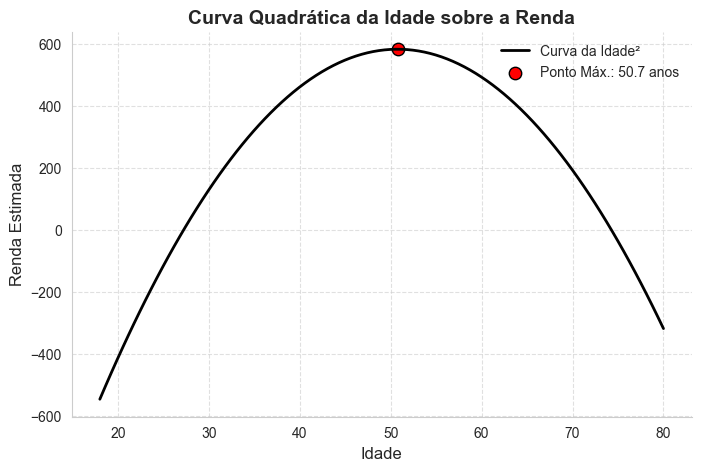

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar estilo clean
sns.set_style("whitegrid")

# Obter coeficientes do modelo
b0 = modelo_robusto.params['Intercept']
b1 = modelo_robusto.params['idade']
b2 = modelo_robusto.params['I(idade ** 2)']

# Calcular o ponto de máximo
idade_max = -b1 / (2 * b2)
renda_max = b0 + b1 * idade_max + b2 * (idade_max ** 2)

# Criar um intervalo de valores para idade
idade_range = np.linspace(df['idade'].min(), df['idade'].max(), 100)
renda_estimado = b0 + b1 * idade_range + b2 * (idade_range ** 2)

# Criar o gráfico
plt.figure(figsize=(8, 5))

# Plotar curva quadrática
plt.plot(idade_range, renda_estimado, color='black', linewidth=2, label="Curva da Idade²")

# Destacar ponto de máximo
plt.scatter(idade_max, renda_max, color='red', edgecolor='black', s=80, label=f"Ponto Máx.: {idade_max:.1f} anos")

# Ajustes do gráfico
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Renda Estimada", fontsize=12)
plt.title("Curva Quadrática da Idade sobre a Renda", fontsize=14, fontweight='bold')
plt.legend(frameon=False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Remover bordas desnecessárias
sns.despine()

# Mostrar gráfico
plt.show()
